In [1]:
from IPython.display import Image 

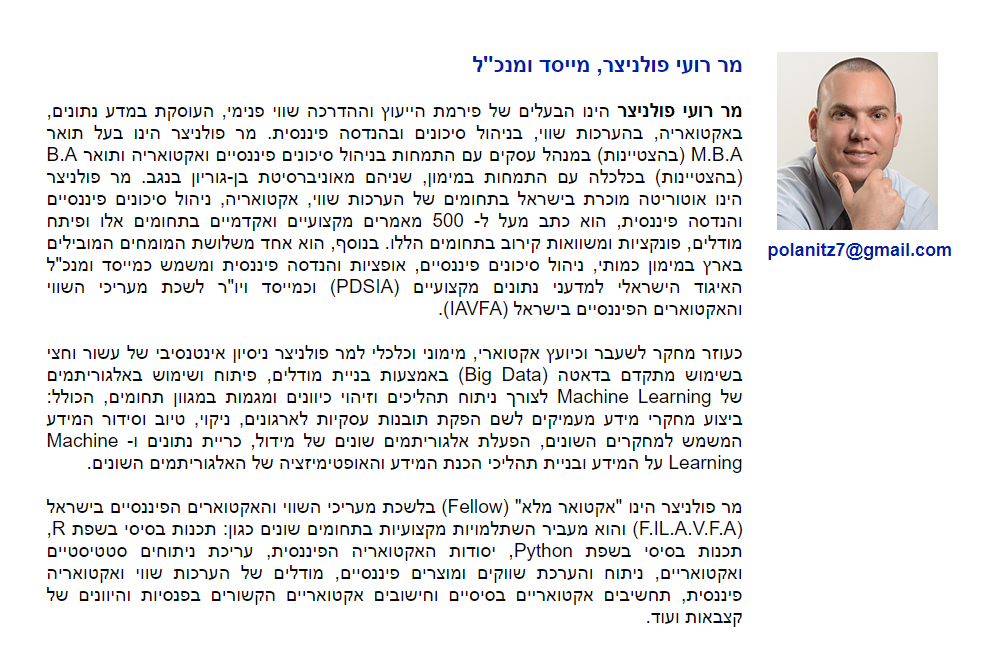

In [2]:
Image(filename='roi123.png')

__Logistic Regression__ is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

## Logistic Regression Assumptions
1. Binary logistic regression requires the dependent variable to be binary.
2. For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.
3. Only the meaningful variables should be included.
4. The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.
5. The independent variables are linearly related to the log odds.
6. Logistic regression requires quite large sample sizes.
Keeping the above assumptions in mind, let’s look at our dataset.

# Data

The dataset comes from the Igal, and it is related to the passengers on the Titanic shipwreck. The classification goal is to predict whether the passenger will survive (1) or not (0) (variable y). The dataset can be downloaded from here.

In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

The dataset provides the titanic passengers’ information. It includes 891 records and 12 fields.

In [4]:
train = pd.read_csv('titanic_train.csv')
print(train.shape)
print(train.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
test = pd.read_csv('titanic_test.csv')
print(test.shape)
print(test.columns)

(418, 11)
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
train.rename(columns={"Survived":"y"}, inplace=True)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
y              891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Input variables

1. PassengerId: Passanger's ID (numeric)

2. Pclass: Ticket class (categorical: "1", "2", "3")

3. Name: Passanger's name

4. Sex: Passanger's sex (categorical: "female", "male")

5. Age: Passanger's age (numeric). Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

6. SibSp: Number of siblings / spouses aboard the Titanic (numeric). "Sibling" = brother, sister, stepbrother, stepsister, while Spouse = husband, wife (mistresses and fiancés were ignored)

7. Parch: Number of parents / children aboard the Titanic. Parent = mother, father, while "Child" = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.

8. Ticket: Ticket's number (numeric)

9. Fare: Passenger fare (numeric)

10. Cabin: Cabin number

11. Embarked: Port of Embarkation (categorical: "C" = Cherbourg, "Q" = Queenstown, "S" = Southampto


## Predict variable (desired target):

y — has the passanger survived? (binary: “1”, means “Yes”, “0” means “No”)

In [12]:
train.drop(['Cabin', 'Age'], axis=1, inplace=True)
test.drop(['Cabin', 'Age'], axis=1, inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
y              891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(1), int64(4), object(4)
memory usage: 29.5+ KB


# Data exploration

In [15]:
train['y'].value_counts()

0    549
1    342
Name: y, dtype: int64

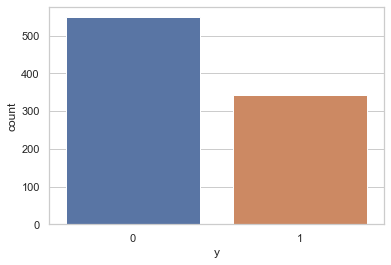

<Figure size 432x288 with 0 Axes>

In [16]:
sns.countplot(x='y', data=train)
plt.show()
plt.savefig('count_plot')

In [17]:
count_no_Survival = len(train[train['y']==0])
count_Survival = len(train[train['y']==1])
pct_of_no_Survival = count_no_Survival/(count_no_Survival+count_Survival)
print("\033[1m percentage of no Survival is\033[1m", pct_of_no_Survival*100)
pct_of_Survival = count_Survival/(count_no_Survival+count_Survival)
print("\033[1m percentage of Survival\033[1m", pct_of_Survival*100)

 percentage of no Survival is 61.61616161616161
 percentage of Survival 38.38383838383838


Our classes are imbalanced, and the ratio of no-survive to survive instances is 62:38. Before we go ahead to balance the classes, let’s do some more exploration.

In [18]:
train.groupby('y').mean()

,PassengerId,Pclass,SibSp,Parch,Fare
y,,,,,
0,447.016393,2.531876,0.553734,0.329690,22.117887
1,444.368421,1.950292,0.473684,0.464912,48.395408


# Visualizations

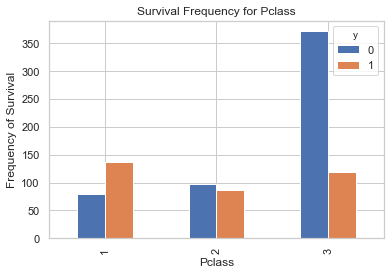

In [19]:
%matplotlib inline
pd.crosstab(train.Pclass,train.y).plot(kind='bar')
plt.title('Survival Frequency for Pclass')
plt.xlabel('Pclass')
plt.ylabel('Frequency of Survival')
plt.savefig('Survival_fre_Pclass')

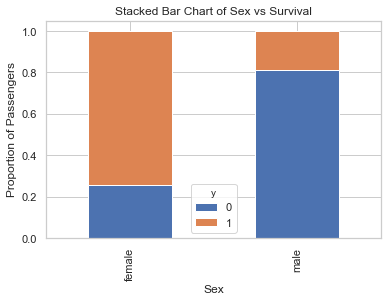

In [20]:
table=pd.crosstab(train.Sex,train.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Sex vs Survival')
plt.xlabel('Sex')
plt.ylabel('Proportion of Passengers')
plt.savefig('Sex_vs_Survival_stack')

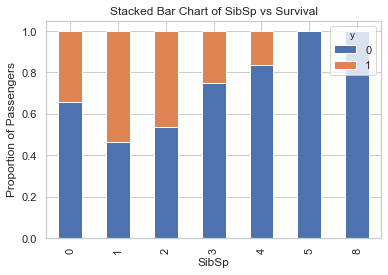

In [21]:
table=pd.crosstab(train.SibSp,train.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of SibSp vs Survival')
plt.xlabel('SibSp')
plt.ylabel('Proportion of Passengers')
plt.savefig('SibSp_vs_Survival_stack')

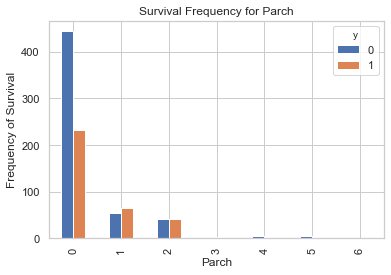

In [22]:
pd.crosstab(train.Parch,train.y).plot(kind='bar')
plt.title('Survival Frequency for Parch')
plt.xlabel('Parch')
plt.ylabel('Frequency of Survival')
plt.savefig('Survival_Parch_bar')

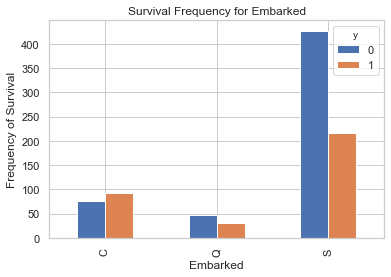

In [23]:
pd.crosstab(train.Embarked,train.y).plot(kind='bar')
plt.title('Survival Frequency for Embarked')
plt.xlabel('Embarked')
plt.ylabel('Frequency of Survival')
plt.savefig('Survival_fre_Embarked_bar')

# Create dummy variables

In [24]:
train.head()

,PassengerId,y,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,S


In [26]:
cat_vars=['Pclass','Sex', 'SibSp','Parch','Embarked']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(train[var], prefix=var)
    train1=train.join(cat_list)
    train=train1
cat_vars=['Pclass','Sex','SibSp','Parch','Embarked']
train_vars=train.columns.values.tolist()
to_keep=[i for i in train_vars if i not in cat_vars]

Our final train set columns will be:

In [27]:
train_final=train[to_keep]
train_final.columns.values

array(['PassengerId', 'y', 'Name', 'Ticket', 'Fare', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0',
       'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8',
       'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5',
       'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [28]:
cat_vars=['Pclass','Sex', 'SibSp','Parch','Embarked']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(test[var], prefix=var)
    test1=test.join(cat_list)
    test=test1
cat_vars=['Pclass','Sex','SibSp','Parch','Embarked']
test_vars=test.columns.values.tolist()
to_keep=[i for i in test_vars if i not in cat_vars]

In [29]:
test_final=test[to_keep]
test_final.columns.values

array(['PassengerId', 'Name', 'Ticket', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1',
       'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0',
       'Parch_1', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6',
       'Parch_9', 'Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [30]:
train_final.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
test_final.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Over-sampling using SMOTE

With our training data created, I’ll up-sample the no-Survival using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:
1. Works by creating synthetic samples from the minor class (no-Survival) instead of creating copies.
2. Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observations.

We are going to implement SMOTE in Python.

In [31]:
X_train = train_final.loc[:, train_final.columns != 'y']
y_train = train_final.loc[:, train_final.columns == 'y']
X_test = test_final.loc[:, test_final.columns != 'y']

In [32]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [33]:
columns1 = X_train.columns
os_data_X, os_data_y = os.fit_sample(X_train, y_train)
os_test_X = X_test

In [34]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns1)
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("\033[1m length of oversampled data is ",len(os_data_X))
print("\033[1m Number of no Survival in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("\033[1m Number of Survival",len(os_data_y[os_data_y['y']==1]))
print("\033[1m Proportion of no Survival data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("\033[1m Proportion of Survival data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

 length of oversampled data is  1098
 Number of no Survival in oversampled data 549
 Number of Survival 549
 Proportion of no Survival data in oversampled data is  0.5
 Proportion of Survival data in oversampled data is  0.5


Now we have a perfect balanced data! You may have noticed that I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

# Recursive Feature Elimination

__Recursive Feature Elimination (RFE)__ is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [35]:
train_final_vars=train_final.columns.values.tolist()
y=['y']
X=[i for i in train_final_vars if i not in y]

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [37]:
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True  True  True  True False  True  True  True  True
  True  True False  True  True  True  True  True  True  True  True]
[4 1 1 1 1 1 1 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
train_X2 = pd.DataFrame({
    'Feature': columns1,
    'Importance': rfe.ranking_},)
train_X2.sort_values(by=['Importance'])

,Feature,Importance
11,SibSp_5,1
20,Embarked_C,1
19,Parch_6,1
18,Parch_5,1
17,Parch_4,1
16,Parch_3,1
15,Parch_2,1
13,Parch_0,1
12,SibSp_8,1
21,Embarked_Q,1


In [39]:
cols=[]
for i in range (0, len(train_X2["Importance"])):
    if train_X2["Importance"][i] == 1:
        cols.append(train_X2["Feature"][i])
print(cols)
print(len(cols))

['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
20


The RFE has helped us select the following features: 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q', 'Embarked_S'

In [40]:
X_train=os_data_X[cols]
y_train=os_data_y['y']

In [41]:
X_test=os_test_X[cols]

# Implementing the model

In [42]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.442136
         Iterations: 35
                           Results: Logit
Model:                Logit            Pseudo R-squared: 0.362      
Dependent Variable:   y                AIC:              1010.9311  
Date:                 2020-06-17 02:00 BIC:              1110.9560  
No. Observations:     1098             Log-Likelihood:   -485.47    
Df Model:             19               LL-Null:          -761.08    
Df Residuals:         1078             LLR p-value:      9.6275e-105
Converged:            0.0000           Scale:            1.0000     
No. Iterations:       35.0000                                       
--------------------------------------------------------------------
            Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
--------------------------------------------------------------------
Pclass_1     2.7771     0.5182  5.3593 0.0000      1.7615     3.7927
Pclass_2     2.0208     0.5149  3.9251 0.0001      1.0118     3.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


# Creating Pseudo y-test using Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_test = rf.predict(X_test)

# Logistic Regression Model Fitting

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Predicting the test set results and calculating the accuracy

In [45]:
y_pred = logreg.predict(X_test)
print("\033[1m Accuracy of logistic regression classifier on test set:", "{:.2%}".format(logreg.score(X_test, y_test)))

 Accuracy of logistic regression classifier on test set: 90.67%


### Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[227  27]
 [ 12 152]]


In [47]:
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,0]+confusion_matrix[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(confusion_matrix[0,1]+confusion_matrix[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(confusion_matrix.sum()))

 The result is telling us that we have:  379 correct predictions.
 The result is telling us that we have:  39 incorrect predictions.
 We have a total predictions of:  418


# Compute precision, recall, F-measure and support

To quote from Scikit Learn:

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y.

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       254
           1       0.85      0.93      0.89       164

    accuracy                           0.91       418
   macro avg       0.90      0.91      0.90       418
weighted avg       0.91      0.91      0.91       418



In [49]:
#calculate Accuracy, how often is the classifier correct?
print("\033[1m Accuracy of logistic regession model:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\033[1m Well, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
#calculate Precision
print("\n\033[1m Precision of logistic regession model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("\033[1m Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted a passenger is going to survive, that passenger actually survived", "{:.2%}".format(metrics.precision_score(y_test, y_pred)) ,"of the time.")
#calculate Recall
print("\n\033[1m Recall of logistic regession model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("\033[1m Recall: If there is a passenger who survived present in the test set and our Logistic Regression model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)) ,"of the time.")

 Accuracy of logistic regession model: 90.67%
 Well, you got a classification rate of 90.67%

 Precision of logistic regession model: 84.92%
 Precision: Precision is about being precise, i.e., how precise your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Logistic Regression model predicted a passenger is going to survive, that passenger actually survived 84.92% of the time.

 Recall of logistic regession model: 92.68%
 Recall: If there is a passenger who survived present in the test set and our Logistic Regression model can identify it 92.68% of the time.


# ROC Curve

__The receiver operating characteristic (ROC)__ curve is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

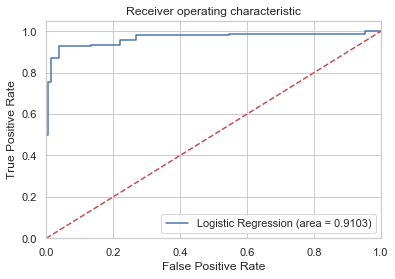

In [50]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Getting the Survival Probability

Finally, the best way to use this model is assigning survival probability for each passenger. To get the survival probability from our model, utilize the code block below:

In [51]:
train['Survival Probability'] = logreg.predict_proba(train[X_train.columns])[:,1]
train[['PassengerId','Name','Survival Probability']].head(10)

,PassengerId,Name,Survival Probability
0,1,"Braund, Mr. Owen Harris",0.127760
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.944473
2,3,"Heikkinen, Miss. Laina",0.681186
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.912133
4,5,"Allen, Mr. William Henry",0.124985
5,6,"Moran, Mr. James",0.172766
6,7,"McCarthy, Mr. Timothy J",0.403610
7,8,"Palsson, Master. Gosta Leonard",0.050807
8,9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0.681079
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",0.898079


# Your Turn!

Hopefully, this post gives you a good idea of what a machine learning classification project looks like. As you can see, much of the work is in the data wrangling and the preparation steps, and these procedures consume most of the time spent on machine learning.

Now it’s time to get out there and start exploring and cleaning your data. Try two or three algorithms, and let me know how it goes.

I would be pleased to receive feedback or questions on any of the above.